#### 模型过拟合与欠拟合

In [1]:
# 导入工具
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [5]:
# 读取数据
train_data_file = './dataset/zhengqi_train.txt'
test_data_file = './dataset/zhengqi_test.txt'
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [7]:
# 归一化处理
from sklearn import preprocessing
features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])
train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']
test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

In [9]:
# PCA降维
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [11]:
# 划分训练数据和测试数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0
)

In [15]:
# 欠拟合
clf = SGDRegressor(max_iter=500, tol=1e-2)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('SGDRegressor train MSE: {}'.format(score_train))
print('SGDRegressor test MSE: {}'.format(score_test))

SGDRegressor train MSE: 0.15140280267489134
SGDRegressor test MSE: 0.1558853714739483


In [16]:
# 过拟合
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('SGDRegressor train MSE: {}'.format(score_train))
print('SGDRegressor test MSE: {}'.format(score_test))

SGDRegressor train MSE: 0.13258466014175807
SGDRegressor test MSE: 0.14499642034793425


In [17]:
# 正常拟合
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('SGDRegressor train MSE: {}'.format(score_train))
print('SGDRegressor test MSE: {}'.format(score_test))

SGDRegressor train MSE: 0.13419142640173773
SGDRegressor test MSE: 0.14262594390594838


#### 模型正则化

In [18]:
# l2正则
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='L2', alpha=0.0001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('SGDRegressor train MSE: {}'.format(score_train))
print('SGDRegressor test MSE: {}'.format(score_test))

SGDRegressor train MSE: 0.13429375081749748
SGDRegressor test MSE: 0.1426219753395351


In [19]:
# l1正则
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='L1', alpha=0.00001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('SGDRegressor train MSE: {}'.format(score_train))
print('SGDRegressor test MSE: {}'.format(score_test))

SGDRegressor train MSE: 0.13432003771695525
SGDRegressor test MSE: 0.14270760371855284


In [20]:
# ElasticNet联合L1和L2范数加权正则好
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='elasticnet', l1_ratio=0.9, alpha=0.00001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('SGDRegressor train MSE: {}'.format(score_train))
print('SGDRegressor test MSE: {}'.format(score_test))

SGDRegressor train MSE: 0.13497617221666022
SGDRegressor test MSE: 0.1432037898708725


#### 模型交叉验证

In [21]:
# 简单交叉验证
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0
)

clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('SGDRegressor train MSE: {}'.format(score_train))
print('SGDRegressor test MSE: {}'.format(score_test))

SGDRegressor train MSE: 0.14143932438645734
SGDRegressor test MSE: 0.14679823313011264


In [22]:
# K折交叉验证
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data, test_data, train_target, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print('{} 折 SGDRegressor train MSE: {}'.format(k, score_train))
    print('{} 折 SGDRegressor test MSE: {}'.format(k, score_test))

0 折 SGDRegressor train MSE: 0.14988099714247516
0 折 SGDRegressor test MSE: 0.10630088992255252
1 折 SGDRegressor train MSE: 0.1334677475591089
1 折 SGDRegressor test MSE: 0.18250146089895147
2 折 SGDRegressor train MSE: 0.14716144149208973
2 折 SGDRegressor test MSE: 0.13332593634152873
3 折 SGDRegressor train MSE: 0.14067424812261492
3 折 SGDRegressor test MSE: 0.16307109246206972
4 折 SGDRegressor train MSE: 0.13883993563423846
4 折 SGDRegressor test MSE: 0.16534986902266802


In [23]:
# 留一法交叉验证
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data, test_data, train_target, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print('{} 个 SGDRegressor train MSE: {}'.format(k, score_train))
    print('{} 个 SGDRegressor test MSE: {}'.format(k, score_test))
    if k >= 9:
        break

0 个 SGDRegressor train MSE: 0.14172224047109752
0 个 SGDRegressor test MSE: 0.013946182150328432
1 个 SGDRegressor train MSE: 0.14154789107132307
1 个 SGDRegressor test MSE: 0.12226573834985914
2 个 SGDRegressor train MSE: 0.14151855472811797
2 个 SGDRegressor test MSE: 0.038823648116813506
3 个 SGDRegressor train MSE: 0.14168079267978742
3 个 SGDRegressor test MSE: 0.003729327592523375
4 个 SGDRegressor train MSE: 0.1416145855385393
4 个 SGDRegressor test MSE: 0.012567070999554394
5 个 SGDRegressor train MSE: 0.1416637779192909
5 个 SGDRegressor test MSE: 0.13404231746870837
6 个 SGDRegressor train MSE: 0.14101392999821705
6 个 SGDRegressor test MSE: 0.024882528245243465
7 个 SGDRegressor train MSE: 0.14172175538838677
7 个 SGDRegressor test MSE: 0.000508279096660602
8 个 SGDRegressor train MSE: 0.1417267631792139
8 个 SGDRegressor test MSE: 0.08938921733985865
9 个 SGDRegressor train MSE: 0.14093178854005334
9 个 SGDRegressor test MSE: 0.054140613449177616


In [25]:
# 留P法交叉验证
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data, test_data, train_target, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print('{} 10个 SGDRegressor train MSE: {}'.format(k, score_train))
    print('{} 10个 SGDRegressor test MSE: {}'.format(k, score_test))
    if k >= 9:
        break

0 10个 SGDRegressor train MSE: 0.14188300301327134
0 10个 SGDRegressor test MSE: 0.049125440203224256
1 10个 SGDRegressor train MSE: 0.1413738347744131
1 10个 SGDRegressor test MSE: 0.04398226614097936
2 10个 SGDRegressor train MSE: 0.14139130436542874
2 10个 SGDRegressor test MSE: 0.045438818186059535
3 10个 SGDRegressor train MSE: 0.1418717863962917
3 10个 SGDRegressor test MSE: 0.05415701575389885
4 10个 SGDRegressor train MSE: 0.14178291340191226
4 10个 SGDRegressor test MSE: 0.0689278534457292
5 10个 SGDRegressor train MSE: 0.14191367401417626
5 10个 SGDRegressor test MSE: 0.04520598450098242
6 10个 SGDRegressor train MSE: 0.1419099038621314
6 10个 SGDRegressor test MSE: 0.04943466593514308
7 10个 SGDRegressor train MSE: 0.1420207452015538
7 10个 SGDRegressor test MSE: 0.05343014336480323
8 10个 SGDRegressor train MSE: 0.1418937573562631
8 10个 SGDRegressor test MSE: 0.046978711616200985
9 10个 SGDRegressor train MSE: 0.14201124113490354
9 10个 SGDRegressor test MSE: 0.045593421938409304


#### 模型超参空间及调参

In [26]:
# 穷举网格搜索
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0
)

randomForestRegressor = RandomForestRegressor()
parameters = {'n_estimators': [50,100,200], 'max_depth':[1,2,3]}
clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor GridSearchCV test MSE: {}".format(score_test))
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE: 0.2558549377840238


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [27]:
# 随机参数优化
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0
)

randomForestRegressor = RandomForestRegressor()
parameters = {'n_estimators': [50,100,200,300], 'max_depth':[1,2,3,4,5]}
clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor RandomizedSearchCV test MSE: {}".format(score_test))
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE: 0.1966720925542268


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [30]:
# LGB调参
clf = lgb.LGBMRegressor(num_leaves=31)
parameters = {'learning_rate': [0.01,0.1,1], 'n_estimators':[20,40]}
clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)
print("Best parameters found by grid search are: ", clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor GridSearchCV test MSE: {}".format(score_test))

Best parameters found by grid search are:  {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor GridSearchCV test MSE: 0.15207976273501952


In [28]:
# LGB线下验证

{'mean_fit_time': array([0.32372341, 0.48003306, 1.69259458, 0.37501721, 0.95822296,
        0.29720836, 0.17156267, 0.47148809, 0.10814223, 0.22817345]),
 'std_fit_time': array([0.04080866, 0.00460156, 0.00890396, 0.00237968, 0.00598605,
        0.01012714, 0.01786687, 0.01603483, 0.01749575, 0.02119174]),
 'mean_score_time': array([0.00515599, 0.00820732, 0.02199402, 0.01268277, 0.01510272,
        0.00794735, 0.00551429, 0.00862694, 0.00484095, 0.00576215]),
 'std_score_time': array([0.0001972 , 0.00018794, 0.00022953, 0.00016838, 0.0004587 ,
        0.00088877, 0.00065072, 0.00101519, 0.00082846, 0.00197751]),
 'param_n_estimators': masked_array(data=[50, 100, 300, 200, 200, 100, 50, 100, 50, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 4, 5, 1, 4, 2, 2, 3, 1, 3],
              mask=[False, False, False, False, False, F

#### 学习曲线和验证曲线

<module 'matplotlib.pyplot' from '/Users/sunjiabin/anaconda3/envs/ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

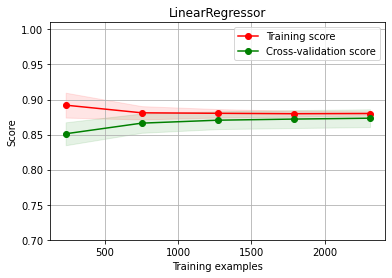

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

plt.figure(figsize=(18,10), dpi=150)

def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color='g')
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color='r',
             label='Training score')
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    return plt
train_data2 = pd.read_csv('./dataset/zhengqi_train.txt', sep='\t')
test_data2 = pd.read_csv('./dataset/zhengqi_test.txt', sep='\t')

X = train_data2[test_data2.columns].values
y = train_data2['target'].values

title = 'LinearRegressor'

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

In [ ]:
# 验证曲线
